In [3]:
import requests
from bs4 import BeautifulSoup
import time

user_agent = {"User-Agent": "XXX"}

# 질문 키워드 빈도
frequency = {}

for i in range(1, 11):
    res = requests.get("https://hashcode.co.kr/?page={}".format(i), user_agent)
    soup = BeautifulSoup(res.text, "html.parser")

    ul_tags = soup.find_all("ul", "question-tags")
    for ul in ul_tags:
        li_tags = ul.find_all("li")

        for li in li_tags:
            tag = li.text.strip()

            if tag not in frequency:
                frequency[tag] = 1

            else:
                frequency[tag] += 1

    time.sleep(0.5)

print(frequency)

{'coding-test': 5, 'javascript': 17, 'scanf': 2, 'python': 233, 'vim': 1, 'c': 43, 'struct': 2, 'generic': 1, 'java': 44, 'deep-learning': 1, 'keyerror': 2, 'pandas': 21, 'dataframe': 10, 'android': 5, 'code': 2, 'matplotlib': 1, 'beautifulsoup': 6, 'replace': 1, 'ai': 3, 'gui': 3, 'tkinter': 4, 'software_development': 1, 'javac': 1, 'ubuntu': 3, 'vmware': 1, 'multithreading': 1, 'algorithm': 6, 'bfs': 1, 'react': 7, 'arduino': 4, 'node.js': 8, 'regex': 3, 'multiprocessing': 1, 'pygame': 1, 'html': 13, 'css': 7, 'application-development': 1, 'logistic-regression': 2, 'logistic': 1, 'error': 7, 'csv': 4, 'class': 8, 'instance': 1, 'hashmap': 1, 'object': 1, 'windows': 2, 'for': 6, 'selenium-webdrive': 6, 'c++': 21, 'mfc': 1, 'win32': 1, 'django': 4, 'recursive': 4, 'flatten': 1, 'python3': 9, 'dictionary': 4, 'array': 3, 'initialization': 2, 'qt': 2, 'pdf': 1, 'hashcode': 1, 'kotlin': 4, 'private': 2, 'image': 3, 'netlify': 1, 'data': 2, 'directory': 1, 'cv2': 1, 'raspberry-pi': 2, 'dom

In [4]:
# Counter를 사용해 가장 빈도가 높은 value 10개 추출

from collections import Counter

counter = Counter(frequency)
counter.most_common(10)

[('python', 233),
 ('java', 44),
 ('c', 43),
 ('pandas', 21),
 ('c++', 21),
 ('javascript', 17),
 ('html', 13),
 ('dataframe', 10),
 ('python3', 9),
 ('crawling', 9)]

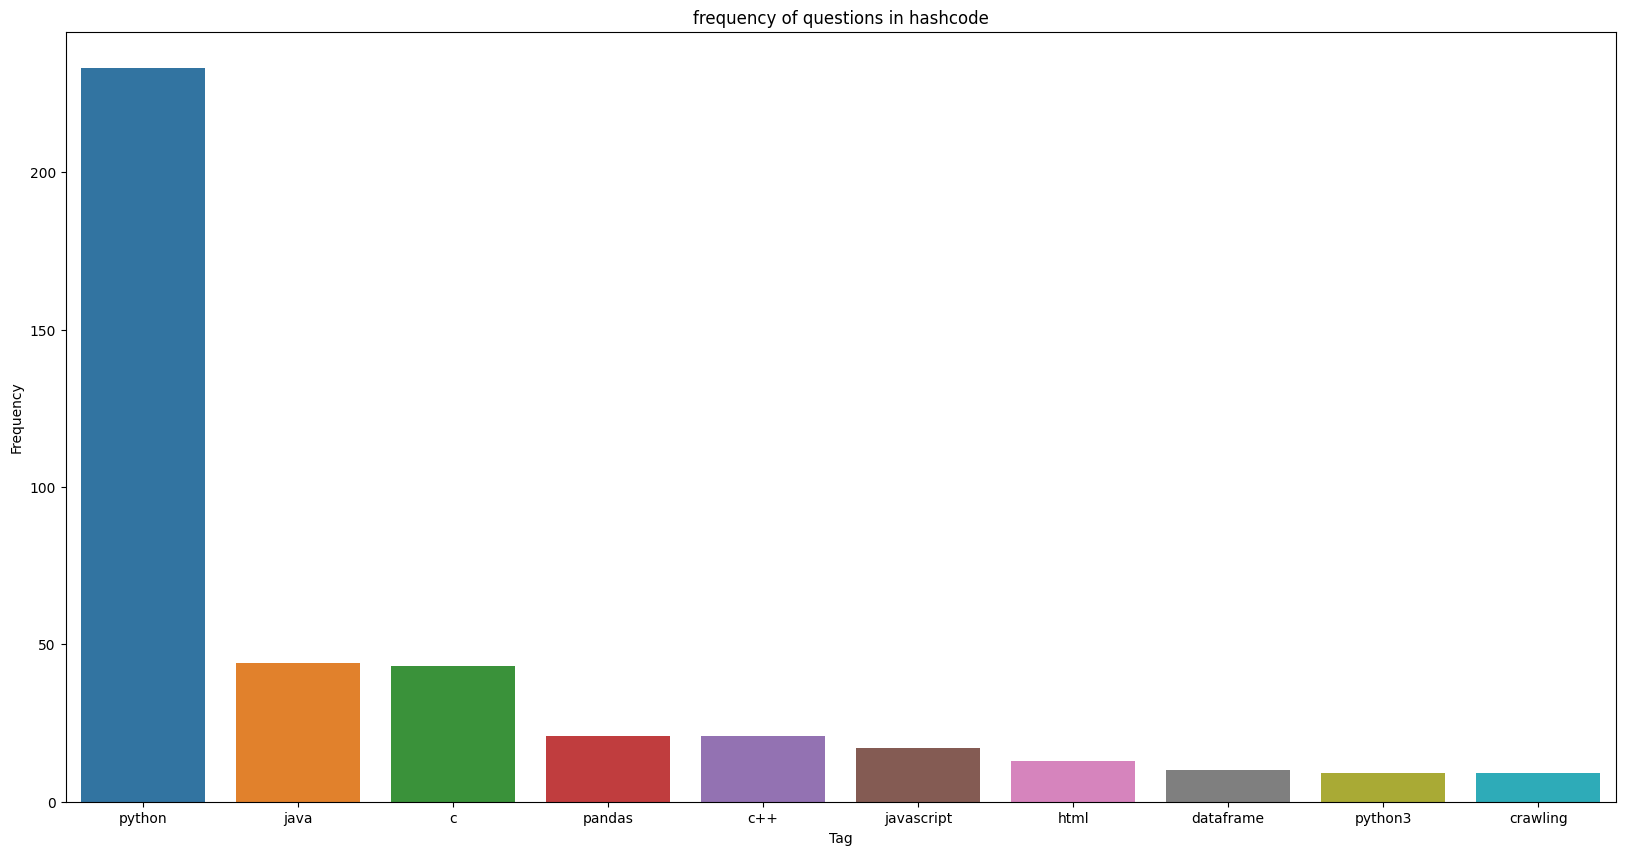

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))
plt.title("frequency of questions in hashcode")
plt.xlabel("Tag")
plt.ylabel("Frequency")

# x: 키워드 / y: 키워드의 빈도수
x = [ele[0] for ele in counter.most_common(10)]
y = [ele[1] for ele in counter.most_common(10)]

sns.barplot(x = x, y = y)
plt.show()